In [1]:
import numpy as np

# Load data
import pandas as pd

# Visualize data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
from sklearn.model_selection import train_test_split

# Load and modify data

In [2]:
df = pd.read_csv('data/ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [3]:
# Only use 0 and 1 for user_action
df = df.drop(df[df['user_action'] > 1].index)

In [4]:
items = ['is_mobile', 'n_products_viewed', 'visit_duration', 'time_of_day']
X = df[items].copy()
Y = df['user_action'].copy()

In [5]:
# Normalize data
X['n_products_viewed'] = (X['n_products_viewed'] - X['n_products_viewed'].mean()) / X['n_products_viewed'].std()
X['visit_duration'] = (X['visit_duration'] - X['visit_duration'].mean()) / X['visit_duration'].std()

In [6]:
# Transform time_of_day to one hot encoding
X = X.join(pd.get_dummies(X['time_of_day']))
X = X.drop(['time_of_day'], axis = 1)

In [7]:
X.head()

,is_mobile,n_products_viewed,visit_duration,0,1,2,3
0,1,-0.673141,-0.274422,0.0,0.0,0.0,1.0
1,1,0.462072,-0.373996,0.0,0.0,1.0,0.0
2,1,-0.673141,-0.963261,0.0,1.0,0.0,0.0
6,0,-0.673141,0.602007,0.0,1.0,0.0,0.0
7,1,-0.673141,-0.971082,0.0,0.0,0.0,1.0


In [8]:
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size = 0.3)

# Logistic regression

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
def feed_foward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [11]:
def accuracy(Y, pred):
    return np.mean(Y == pred)

In [12]:
def cross_entropy(T, pred):
    return -np.mean(T*np.log(pred) + (1 - T)*np.log(1 - pred))

In [13]:
W = np.random.randn(X.shape[1])
b = 0

In [14]:
logits = feed_foward(X, W, b)
predictions = np.round(logits)

In [15]:
accuracy(Y, predictions)

0.53517587939698497

In [16]:
training_costs = []
test_costs = []

# Hyperparameters
n_interations = 10000
learning_rate = 3e-4

In [17]:
for i in range(n_interations):
    # Predict train and test
    predict_train = feed_foward(features_train, W, b)
    predict_test = feed_foward(features_test, W, b)
    
    # Perform gradient descent    
    W -= learning_rate * features_train.T.dot(predict_train - labels_train)
    b -= learning_rate * (predict_train - labels_train).sum()
    
    # Calculate costs
    training_cost = cross_entropy(labels_train, predict_train)
    training_costs.append(training_cost)
    test_cost = cross_entropy(labels_test, predict_test)
    test_costs.append(test_cost)
    
    # Calculate accuracy
    if i % 100 == 0:
        print('Cross entropy: ', training_cost)
        print('Accuracy on train:', accuracy(labels_train, np.round(predict_train)))  
        print('Accuracy on test:', accuracy(labels_test, np.round(predict_test)))
        print('-------------------------')

Cross entropy:  0.8055790555926327
Accuracy on train: 0.532374100719
Accuracy on test: 0.541666666667
-------------------------
Cross entropy:  0.31952507628807697
Accuracy on train: 0.91726618705
Accuracy on test: 0.891666666667
-------------------------
Cross entropy:  0.253423336563084
Accuracy on train: 0.938848920863
Accuracy on test: 0.925
-------------------------
Cross entropy:  0.22608707582192633
Accuracy on train: 0.956834532374
Accuracy on test: 0.933333333333
-------------------------
Cross entropy:  0.2115277806603052
Accuracy on train: 0.956834532374
Accuracy on test: 0.933333333333
-------------------------
Cross entropy:  0.20273412006366215
Accuracy on train: 0.94964028777
Accuracy on test: 0.958333333333
-------------------------
Cross entropy:  0.19697181299469113
Accuracy on train: 0.964028776978
Accuracy on test: 0.966666666667
-------------------------
Cross entropy:  0.19296972477138952
Accuracy on train: 0.964028776978
Accuracy on test: 0.975
------------------

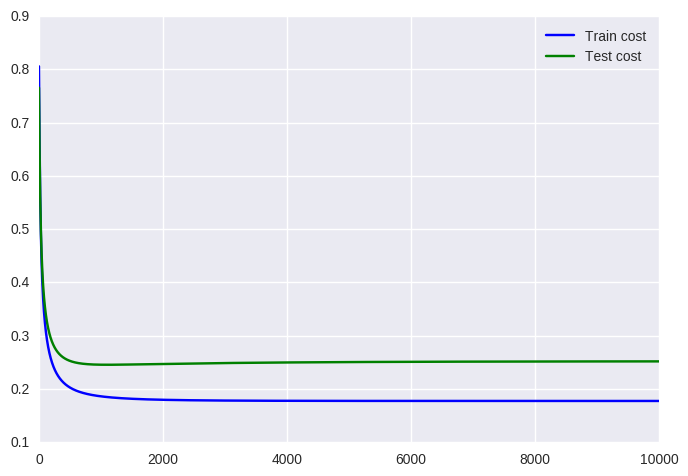

In [18]:
plt.plot(training_costs, c = 'b', label = 'Train cost')
plt.plot(test_costs, c = 'g', label = 'Test cost')
plt.legend()